<a href="https://colab.research.google.com/github/conexaomundom/Computacional/blob/master/Paraiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO COMPLETO PARA A PARAÍBA

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("ggplot2")
install.packages("RColorBrewer")
install.packages("readr")
install.packages("readxl")
install.packages("nortest")
install.packages("forecast")

In [4]:
%%R
library("ggplot2")
library("RColorBrewer")
library("readr")
library("readxl")
library("nortest")

In [6]:
%%R
load("/content/PB2016.Rda")
# posicao <- which(PB2016$Município == 250750) # 361094

# jp_PB2016 <- data.frame(PB2016[posicao, ])

In [ ]:
%%R
# 
# length(levels(as.factor(PB2016$`CBO Ocupação 2002`))) # 1969
# levels(as.factor(PB2016$Faixa.Remun.Média..SM.))
# "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "99"
sm <- 880 
# Pontos medios
pm <- c(0.5*sm, # 0
        ((0.51+1.0)/2)*sm, # 1 
        ((1.01+1.5)/2)*sm, # 2 
        ((1.51+2.0)/2)*sm, # 3
        ((2.01+3.0)/2)*sm, # 4
        ((3.01+4.0)/2)*sm, # 5
        ((4.01+5.0)/2)*sm, # 6
        ((5.01+7.0)/2)*sm, # 7
        ((7.01+10.0)/2)*sm, # 8
        ((10.01+15.0)/2)*sm, # 9
        ((15.01+20.0)/2)*sm, # 10
        (20.01)*sm) # 11


for(i in 0:11){
    posicao <- which(PB2016$`Faixa Remun Média (SM)` == i)
    PB2016$`Faixa Remun Média (SM)`[posicao] <- pm[i+1]
}

length(which(PB2016$`Faixa Remun Média (SM)` == 99)) # 11774

In [ ]:
%%R
# Modelo completo
PB2016$`Faixa Etária`[which(PB2016$`Faixa Etária` == 99)] <- 1
PB2016$`Faixa Etária`[which(PB2016$`Faixa Etária` == 5)] <- 1
PB2016$`Raça Cor`[which(PB2016$`Raça Cor` == 9)] <- 1

modelo_complt <- lm(`Faixa Remun Média (SM)` ~ as.factor(`Sexo Trabalhador`) + 
                      as.factor(`Faixa Etária`) +  as.factor(`Escolaridade após 2005`) +
                      `Qtd Hora Contr` + as.factor(`Raça Cor`), data = PB2016)
summary(modelo_complt)

# Selecao de variaveis                    Estimate Std. Error t value Pr(>|t|)
# as.factor(`Faixa Etária`)99            100.3208   880.1269   0.114  0.90925
# as.factor(`Faixa Etária`)5              64.0373   361.1864   0.177  0.85928
# as.factor(`Raça Cor`)9                 -52.4690    60.7993  -0.863  0.38814

In [13]:
%%R
# 
#--------------------------------------------
#Analise Residual e de Diagnostico
#--------------------------------------------

residuo <- residuals(modelo_complt)
fit <- fitted.values(modelo_complt)

#Calculo dos Residuos padronizados, valores Ajustados, Medidas de Alavanca e Influencia

ard = ls.diag(modelo_complt)

respadron <- ard$std.res

hi <- ard$hat #medidas de alavanca
cook <- ard$cooks #medidas de influencia
dfits <- ard$dfits #medidas de influencia


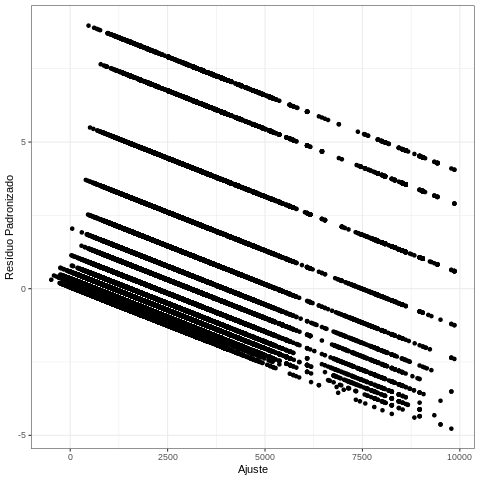

In [14]:
%%R
#Grafico de Homocedasticidade
library(ggplot2)
theme_set(theme_bw())
homo <- data.frame(fit, respadron)
g1 <- ggplot(homo, aes(fit, respadron))
g1 + geom_point() + labs(x = "Ajuste", y = "Resíduo Padronizado")

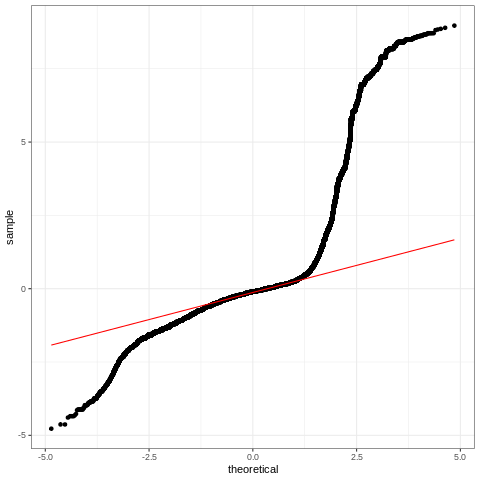

In [16]:
%%R
#Grafico de Normalidade
library(nortest)
lillie.test(respadron)
# shapiro.test(respadron)

ggplot(data.frame(respadron), aes(sample = respadron))+
  stat_qq() + stat_qq_line(colour = "red")

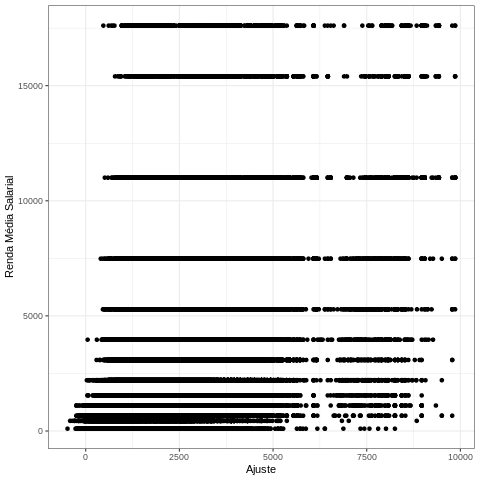

In [18]:
%%R
#Grafico de Linearidade
line <- data.frame(fit, PB2016$`Faixa Remun Média (SM)`)
g3 <- ggplot(line, aes(fit, PB2016$`Faixa Remun Média (SM)`)) + geom_point()
# g3 + geom_point() #+ labs(x = "Ajuste", y = "Resíduo Padronizado")
g3 + labs(x = "Ajuste", y = "Renda Média Salarial")

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



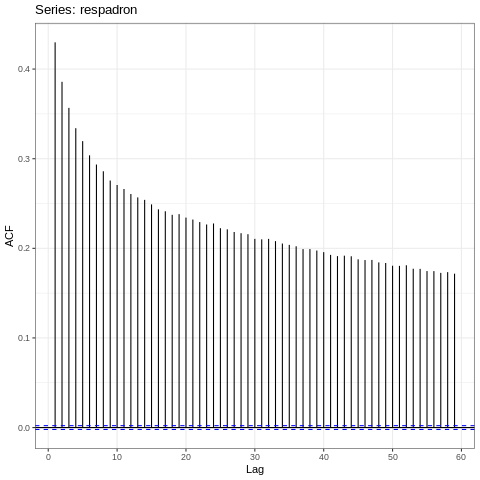

In [19]:
%%R
# Usando o gráfico de Autocorrelacao
# acf(respadron)
library(forecast)
ggAcf(respadron)

**Modelos univariados**

In [41]:
%%R
load("/content/PB2016.Rda")

In [ ]:
%%R
# romando o modelo linear unitário `Sexo Trabalhador`
modelo1 <- lm(`Faixa Remun Média (SM)` ~ as.factor(`Sexo Trabalhador`), data = PB2016)
summary(modelo1)


**Analise Residual e de Diagnostico MODELOS UNITÁRIOS Var Sexo**

In [47]:
%%R 
# MODELOS UNITÁRIOS
#--------------------------------------------
#Analise Residual e de Diagnostico
#--------------------------------------------

residuo1 <- residuals(modelo1)
fit1 <- fitted.values(modelo1)

#Calculo dos Residuos padronizados, valores Ajustados, Medidas de Alavanca e Influencia

ard1 = ls.diag(modelo1)

respadron1 <- ard1$std.res

hi1 <- ard1$hat #medidas de alavanca
cook1 <- ard1$cooks #medidas de influencia
dfits1 <- ard1$dfits #medidas de influencia

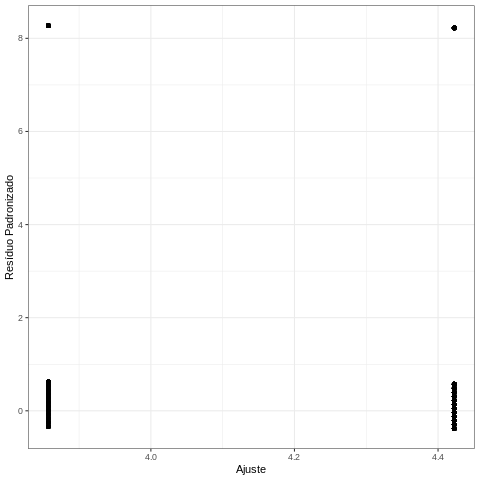

In [48]:
%%R 
# Grafico de Homocedasticidade
library(ggplot2)
theme_set(theme_bw())
homo1 <- data.frame(fit1, respadron1)
g11 <- ggplot(homo1, aes(fit1, respadron1))
g11 + geom_point() + labs(x = "Ajuste", y = "Resíduo Padronizado")

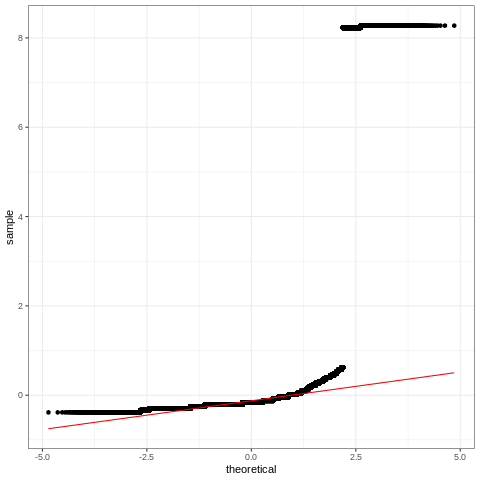

In [49]:
%%R 
# Grafico de Normalidade
library(nortest)
lillie.test(respadron1)
# shapiro.test(respadron)

ggplot(data.frame(respadron1), aes(sample = respadron1))+
  stat_qq() + stat_qq_line(colour = "red")

# qqnorm(respadron); qqline(respadron, col=2)

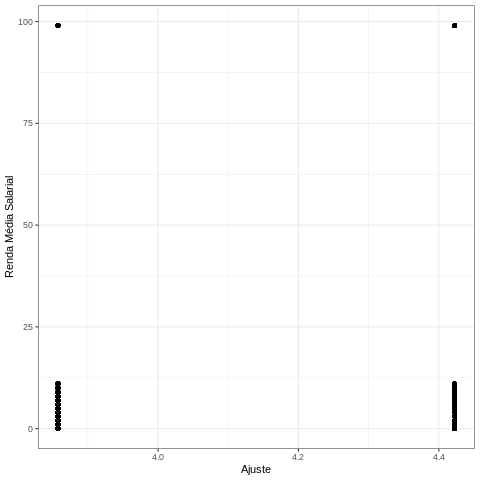

In [50]:
%%R 
#Exmplo: caso de normaliadde
# = rnorm(100, 0, 1)
#qqnorm(respadron1); qqline(respadron1, col=2)

#Grafico de Linearidade
line1 <- data.frame(fit1, PB2016$`Faixa Remun Média (SM)`)
g31 <- ggplot(line1, aes(fit1, PB2016$`Faixa Remun Média (SM)`)) + geom_point()
# g31 + geom_point() #+ labs(x = "Ajuste", y = "Resíduo Padronizado")
g31 + labs(x = "Ajuste", y = "Renda Média Salarial")

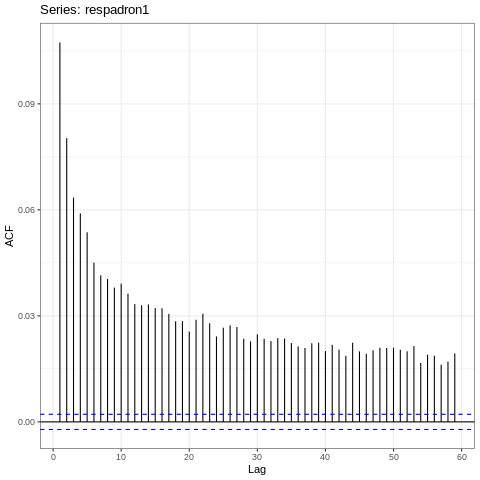

In [51]:
%%R 
# Usando o gráfico de Autocorrelacao
# acf(respadron)
library(forecast)
ggAcf(respadron1)

In [40]:
%%R
# romando o modelo linear unitário "Faixa Etária"
PB2016$`Faixa Etária`[which(PB2016$`Faixa Etária` == 2)] <- 1
PB2016$`Faixa Etária`[which(PB2016$`Faixa Etária` == 99)] <- 1
modelo2 <- lm(`Faixa Remun Média (SM)` ~ as.factor(`Faixa Etária`), data = PB2016)
summary(modelo2)
# Selecao de variaveis        Estimate Std. Error t value Pr(>|t|)
# as.factor(`Faixa Etária`)2     0.194      2.467   0.079   0.9373
# as.factor(`Faixa Etária`)99   1.1727     4.6974   0.250    0.803


Call:
lm(formula = `Faixa Remun Média (SM)` ~ as.factor(`Faixa Etária`), 
    data = PB2016)

Residuals:
   Min     1Q Median     3Q    Max 
-6.762 -2.475 -1.654 -0.654 97.668 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.3324     0.3080   4.327 1.51e-05 ***
as.factor(`Faixa Etária`)3   1.8136     0.3099   5.852 4.86e-09 ***
as.factor(`Faixa Etária`)4   2.3218     0.3096   7.500 6.41e-14 ***
as.factor(`Faixa Etária`)5   2.7213     0.3088   8.814  < 2e-16 ***
as.factor(`Faixa Etária`)6   3.1423     0.3092  10.164  < 2e-16 ***
as.factor(`Faixa Etária`)7   3.9273     0.3095  12.688  < 2e-16 ***
as.factor(`Faixa Etária`)8   5.4294     0.3259  16.660  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.48 on 831616 degrees of freedom
Multiple R-squared:  0.0038,	Adjusted R-squared:  0.003793 
F-statistic: 528.7 on 6 and 831616 DF,  p-value: < 2.2e-16



In [42]:
%%R
# romando o modelo linear unitário "Escolaridade após 2005"
# PB2016$`Escolaridade após 2005`[which(PB2016$`Escolaridade após 2005` == 6)] <- 1
modelo3 <- lm(`Faixa Remun Média (SM)` ~ as.factor(`Escolaridade após 2005`), data = PB2016)
summary(modelo3)
# Selecao de variaveis                    Estimate Std. Error t value Pr(>|t|)



Call:
lm(formula = `Faixa Remun Média (SM)` ~ as.factor(`Escolaridade após 2005`), 
    data = PB2016)

Residuals:
   Min     1Q Median     3Q    Max 
-7.557 -2.100 -1.717 -0.717 95.283 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             5.8116     0.1231  47.200  < 2e-16 ***
as.factor(`Escolaridade após 2005`)2   -0.9227     0.1370  -6.736 1.63e-11 ***
as.factor(`Escolaridade após 2005`)3   -1.1840     0.1455  -8.136 4.09e-16 ***
as.factor(`Escolaridade após 2005`)4   -1.4342     0.1348 -10.640  < 2e-16 ***
as.factor(`Escolaridade após 2005`)5   -1.9191     0.1278 -15.014  < 2e-16 ***
as.factor(`Escolaridade após 2005`)6   -1.7500     0.1347 -12.988  < 2e-16 ***
as.factor(`Escolaridade após 2005`)7   -2.0941     0.1246 -16.812  < 2e-16 ***
as.factor(`Escolaridade após 2005`)8   -1.8166     0.1418 -12.814  < 2e-16 ***
as.factor(`Escolaridade após 2005`)9   -0.7117     0.1264  -5.629 1.81e-08 ***
as.fact

In [43]:
%%R
# romando o modelo linear unitário `Qtd Hora Contr`
modelo4 <- lm(`Faixa Remun Média (SM)` ~ `Qtd Hora Contr`, data = PB2016)
summary(modelo4)


Call:
lm(formula = `Faixa Remun Média (SM)` ~ `Qtd Hora Contr`, data = PB2016)

Residuals:
   Min     1Q Median     3Q    Max 
-5.259 -2.192 -2.083 -0.466 94.917 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.286559   0.073797   71.64   <2e-16 ***
`Qtd Hora Contr` -0.027358   0.001816  -15.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.5 on 831621 degrees of freedom
Multiple R-squared:  0.0002729,	Adjusted R-squared:  0.0002717 
F-statistic:   227 on 1 and 831621 DF,  p-value: < 2.2e-16



In [46]:
%%R
# romando o modelo linear unitário `Raça Cor`
PB2016$`Raça Cor`[which(PB2016$`Raça Cor` == 6)] <- 1
PB2016$`Raça Cor`[which(PB2016$`Raça Cor` == 2)] <- 1
modelo5 <- lm(`Faixa Remun Média (SM)` ~ as.factor(`Raça Cor`), data = PB2016)
summary(modelo5)
# Selecao de variaveis      Estimate Std. Error t value Pr(>|t|)
# as.factor(`Raça Cor`)6   0.02278    0.39333   0.058 0.953814
# as.factor(`Raça Cor`)2   -0.2095     0.1437  -1.458 0.144872


Call:
lm(formula = `Faixa Remun Média (SM)` ~ as.factor(`Raça Cor`), 
    data = PB2016)

Residuals:
   Min     1Q Median     3Q    Max 
-4.737 -2.441 -1.827 -0.622 95.378 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.73657    0.02800 169.193  < 2e-16 ***
as.factor(`Raça Cor`)4  -0.39609    0.08846  -4.477 7.56e-06 ***
as.factor(`Raça Cor`)8  -0.29516    0.03463  -8.523  < 2e-16 ***
as.factor(`Raça Cor`)9  -0.90928    0.05633 -16.142  < 2e-16 ***
as.factor(`Raça Cor`)99 -1.11418    0.03565 -31.252  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.49 on 831618 degrees of freedom
Multiple R-squared:  0.001504,	Adjusted R-squared:  0.001499 
F-statistic: 313.2 on 4 and 831618 DF,  p-value: < 2.2e-16

